# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
#okay for the first one I need to chat it out a bit then I'll make the function.
#True Positive Rate = 100% (Basically a drunk will not slip by this test) (type 2 errors)
#False Positive Rate = 8% (Basically the rate of nondrunks are being identified as drunks) (type 1 errors)
#Prior Believe = 1/1000 (We believe 1 in 1000 drivers is drunk. This is kind of vague, I accept it for now with a side-eye
#should I be considering self reported drunk drivers, vs caught drunk drivers. If it is caught drunk drivers would that
#skew this, since police look for specific behaviors to identify drunk drivers. If I have time I'll google some stats)
#Probability of getting a non drunk = 999/1000 (We believe 999 out of 1000 drivers are not drunk)

#Okay I'm pretty sure I can just get this function out real quick.  We can assume the true_positive_rate will never change
#, and if we return the new probability,  we can just use a loop to iterate over this function as much as we need. So lets
#just crank out bayes theorem

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  #we are assuming this based off the above description. This is not a trivial variable.
  true_positive_rate = 1 

  prob_not_drunk = 1 - prob_drunk_prior

  #true positive rate * prior belief
  numerator = true_positive_rate * prob_drunk_prior

  #(true positive rate * prior belief) + (false positive rate * probability of getting a non-drunk)
  denominator = (true_positive_rate * prob_drunk_prior) + (false_positive_rate * prob_not_drunk)

  return numerator / denominator


Okay to describe what is happening above.
#numerator:#
We are identifying our prior beliefs, and at what rate that might be verifiably wrong (I'm assuming to get a 100% true positive rate, that maybe a blood test is given as a control?). I'll say this is our prior beliefs adjusted for truthfulness.
#denominator:#
We are taking the rate of our truthful prior beliefs (see numerator) and adding in the rate at which we'd get a falsely identified non-drunk.

In [2]:
#lets see how it works
test1 = prob_drunk_given_positive(1/1000, .08)
print(test1)

0.012357884330202669


In [5]:
#alright, and lets verify I did code it right by using our example data
#from class.  1/200 prior belief, .01 false positive rate. I expect to get .334 probability
verify = prob_drunk_given_positive(1/200, .01)
print(verify)

0.33444816053511706


In [7]:
#Okay wow, that is crazy low probability someone is drunk. I guess I knew false positives were bad
#but I had no idea the impact.  Lets find that 95% probability someone is drunk

prior = 1/1000
false_pos = .08
for i in range(0, 100):
  prior = prob_drunk_given_positive(prior, false_pos)
  print('test' + str(i+1) + ': ' + str(prior))

  if prior >= .95:
    break

test1: 0.012357884330202669
test2: 0.13525210993291495
test3: 0.6615996951348605
test4: 0.9606895076105054


##scipy.stats.bayes_mvs###

In [0]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values = ' ?')

In [11]:
#okay so lets take a look at education level of the adult dataset
print(df['education-num'].mean())
df['education-num'].value_counts()

10.0806793403151


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [18]:
#Lets just do a quick side by side of bayesian and frequentist

#bayesian, We aren't going to just copy this from the class code. This thing returns
#more than what we used, so I want to see what that is.
ci_bayes = stats.bayes_mvs(df['education-num'], alpha = .95)

print(ci_bayes)

(Mean(statistic=10.0806793403151, minmax=(10.0527355615954, 10.108623119034801)), Variance(statistic=6.6186866304165175, minmax=(6.517018218205304, 6.720355042627731)), Std_dev(statistic=2.5726808256012865, minmax=(2.55292159017661, 2.5924400610259632)))


In [19]:
#okay returns the mean, with the minmax for our confidence interval, same for variance, and standard deviation
#so to really make this a ci_bayes
ci_bayes = ci_bayes[0][1]
ci_bayes

(10.0527355615954, 10.108623119034801)

In [21]:
#lets grab our frequentist confidence interval
ci_freq = stats.t.interval(0.95,                                   #Confidence level/ alpha
                           df.shape[0],                            #length of sample
                           loc = df['education-num'].mean(),       #sample mean
                           scale = stats.sem(df['education-num'])) #std error of the mean

ci_freq

(10.052734093700373, 10.108624586929828)

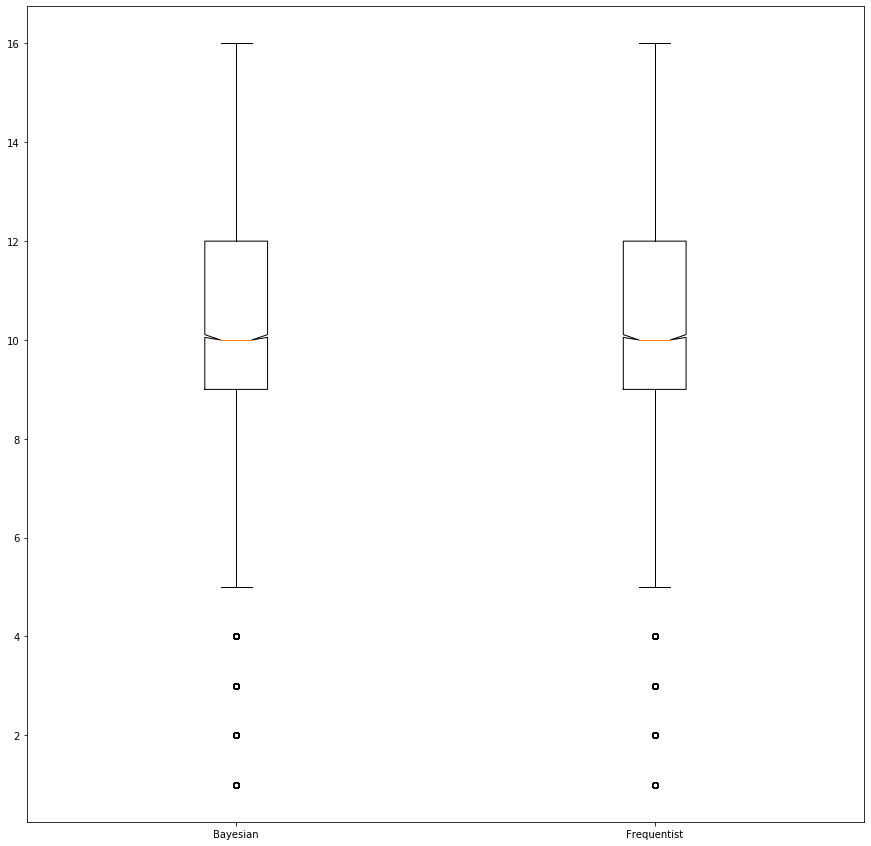

In [52]:
#okay I want to explore plotting a bit. We've done the KDE with vertical lines.  I wonder if a boxplot might be useful.
#got it working for now, I'll pretty it up if I have time.
fig, ax = plt.subplots(figsize = (15, 15))

plt.boxplot([df['education-num'], df['education-num']], notch = True, conf_intervals = [ci_bayes, ci_freq])

ax.set_xticklabels(labels = ['Bayesian', 'Frequentist']);


##Bayesian vs Frequentist approach##

Probably the biggest difference that the Bayesian approach takes into account is the impact that our prior probabilities have on our current probability.  

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!